In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [4]:
df=pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [14]:
#So we're gonna treat this as a regression problem where based off feature1 and feature2, we'll attempt to predict the price.
#So we can imagine that maybe these are measurements of some rare gemstones
from sklearn.model_selection import train_test_split
#feature going to use
X=df[['feature1','feature2']].values #it'll return it back as a NumPy array.
y =df['price'].values #label value

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #split randomly

In [22]:

#Because we're working with weights and biases inside of a neural network,
#if we have really large values in our feature set that could cause errors with the weights.
#But one way to try to avoid any issues when training your network is to normalize and scale your feature data.
#you can normalize or scale your data.
from sklearn.preprocessing import MinMaxScaler
X_train.shape #70% as training set

(700, 2)

In [43]:
#help(MinMaxScaler) # it's going to transform your data
#based off the standard deviation of your data as well as the min and the max values.

In [27]:
scaler=MinMaxScaler()

In [29]:
scaler.fit(X_train) #And what fit does is it simply calculates the parameters it needs to perform the actual scaling later on.
#So what fit does is it essentially calculates the standard deviation, the min and max;


MinMaxScaler()

In [31]:
X_trains=scaler.transform(X_train) #That actually performs a transformation.

In [35]:
X_tests=scaler.transform(X_test) #That actually performs a transformation.

In [37]:
#create the model with the Keras syntax.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [39]:
#we set up a base sequential model and then keep adding layers to it.
#Now, there's two ways of creating a keras based model. 
#then pass in a list of the actual layers you want.
# Dense () it's a regular densely connected neural network layer.
#it's going to be a normal feedforward network where every neuron is connected to every other neuron in the next layer.
#units is just another word for neurons. ,for what activation function these neurons should be using.
#sigmoid activation or a rectified linear unit
# I wanted my first layer to be four neurons ,rectified linear unit is activation function 
model=Sequential([Dense(4,activation='relu'),Dense(2,activation='relu'),Dense(1)]) #next layer has 2 neurons, output layer is 1

In [41]:
#another method
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
#we are predicting a single numerical price value.my very last layer to
#be a single neuron that produces some sort of price.final output is then going to be measured against the true price.
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse') # optimizer is essentially just kind of asking you how do you actually wanna perform this gradient descent?
# RMS prop, atom optimizer.
#loss: what you're actually trying to accomplish here , if you're performing a multi-class classification problem then categorical cross entropy.
#you're performing a binary classification problem but the loss here will be binary cross entropy
#we are performing a regression problem because our label is a continuous value. we'll use mean squared error as our loss functionality
#mse Mean square error


In [45]:
#fit the model to the training data.
model.fit(x=X_trains,y=y_train,epochs=250,verbose=1) #one epoch means you've gone through the entire dataset one time.
#if I've gone through the entirety of X train one time, that is one epoch, my model is going to go through the training set 250 times
#So verbose equals one that essentially indicates the printed output during training
# you should also notice that our mean squared error is very large in the beginning because it essentially starts off with just a random weights and biases
#You'll notice the loss is slowly decreasing and it should decrease very quickly at first, 
#and then kind of slowly as it goes further and further until towards the end,

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259465.9062  
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 258630.6562
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 253813.6562
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 254220.5156
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 258591.5938
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 253520.9531
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 257879.6094
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 254127.3594
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255312.5156 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 252971.5312
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 257420.6875
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 254024.0781
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 252164.1250
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 852us

In [47]:
#how we can actually take a look at this training history by saying Model.History.History.
model.history.history #return losses

{'loss': [256784.15625,
  256728.0625,
  256678.15625,
  256566.71875,
  256434.578125,
  256315.109375,
  256190.78125,
  256055.609375,
  255910.03125,
  255755.546875,
  255592.65625,
  255418.234375,
  255229.71875,
  255026.609375,
  254806.359375,
  254570.96875,
  254318.609375,
  254044.640625,
  253751.046875,
  253439.078125,
  253105.171875,
  252747.296875,
  252365.875,
  251958.234375,
  251529.640625,
  251074.109375,
  250588.296875,
  250073.484375,
  249528.609375,
  248956.5,
  248350.859375,
  247705.984375,
  247031.453125,
  246326.90625,
  245579.890625,
  244791.796875,
  243967.84375,
  243107.046875,
  242204.640625,
  241256.3125,
  240268.734375,
  239235.203125,
  238156.984375,
  237031.109375,
  235850.921875,
  234624.953125,
  233351.265625,
  232023.5,
  230648.109375,
  229213.53125,
  227722.1875,
  226179.984375,
  224578.484375,
  222919.640625,
  221204.984375,
  219427.34375,
  217587.265625,
  215689.03125,
  213729.96875,
  211710.078125,
  209

In [49]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss
0,256784.156250
1,256728.062500
2,256678.156250
3,256566.718750
4,256434.578125


<Axes: >

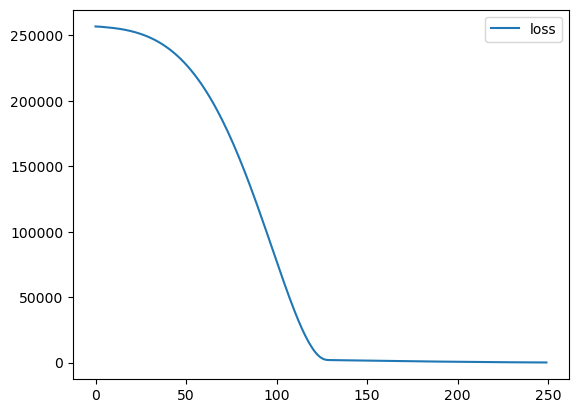

In [51]:
loss_df.plot() #and then as the weights and biases start to get adjusted you hopefully see kind of a steady 
#but steep decline in your loss or your error,


In [53]:
# how well will this model perform on data that it's never seen before,and that data is our test data.
model.evaluate(x=X_tests,y=y_test,verbose=0) #0 means no output
#return our model's loss on the test set in y_test.
#number actually represents is the metric loss that you decided on.it's getting back a mean squared error of 116.927.


116.92710876464844

In [55]:
model.evaluate(x=X_trains,y=y_train,verbose=0)

120.52420806884766

In [75]:
# you how to also grab root mean squared error and mean absolute error.
test_prediction=model.predict(X_test)#we pass in our test features and have the model predict just based off those features
#price should be
test_prediction

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[656026.8 ],
       [657131.56],
       [656978.7 ],
       [656857.8 ],
       [655804.3 ],
       [656903.06],
       [656556.4 ],
       [656309.75],
       [656742.  ],
       [656253.2 ],
       [657072.75],
       [656780.5 ],
       [656094.75],
       [656038.7 ],
       [657299.6 ],
       [656196.44],
       [656571.2 ],
       [657292.9 ],
       [657319.4 ],
       [656848.6 ],
       [655653.44],
       [656225.4 ],
       [655901.44],
       [655893.75],
       [656841.44],
       [657052.  ],
       [656666.2 ],
       [656143.56],
       [657277.25],
       [656081.8 ],
       [656226.1 ],
       [656431.06],
       [656196.56],
       [657414.6 ],
       [656142.9 ],
       [656078.25],
       [656544.56],
       [656763.9 ],
       [656534.9 ],
       [655951.2 ],
       [657112.4 ],
       [656092.06],
       [657039.75],
       [656251.6 ],
       [656515.8 ],
       [656949.  ],
       [657383.1 ],
       [656468.  ],
       [655600.06],
       [656429.9 ],


In [61]:
#convert test prediction to panda series
pd.Series(test_prediction.reshape(300,))#300 column


0      656026.8125
1      657131.5625
2      656978.6875
3      656857.8125
4      655804.3125
          ...     
295    656641.3125
296    656540.1250
297    657064.3125
298    656098.5000
299    656044.8750
Length: 300, dtype: float32

In [77]:
test_prediction=pd.Series(test_prediction.reshape(300,))

In [79]:
pred_data_frame=pd.DataFrame(y_test,columns=['Test True y'])
pred_data_frame.head()

,Test True y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [81]:
pred_data_frame=pd.concat([pred_data_frame,test_prediction],axis=1) #concat at column 


In [83]:
pred_data_frame

,Test True y,0
0,402.296319,656026.8125
1,624.156198,657131.5625
2,582.455066,656978.6875
3,578.588606,656857.8125
4,371.224104,655804.3125
...,...,...
295,525.704657,656641.3125
296,502.909473,656540.1250
297,612.727910,657064.3125
298,417.569725,656098.5000


In [85]:
pred_data_frame.columns=['Test True Y','Model Predictions']
pred_data_frame.head()

,Test True Y,Model Predictions
0,402.296319,656026.8125
1,624.156198,657131.5625
2,582.455066,656978.6875
3,578.588606,656857.8125
4,371.224104,655804.3125


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

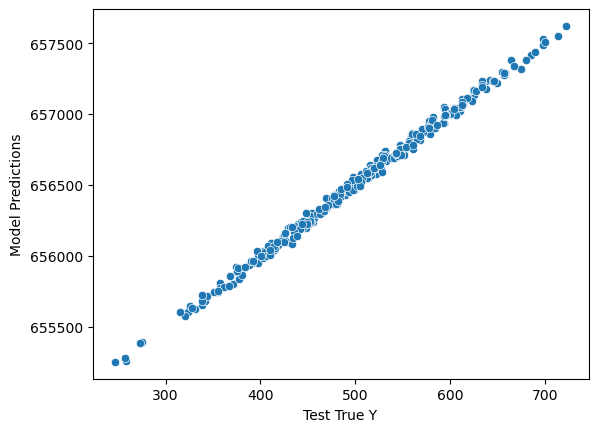

In [87]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_data_frame) #, let's imagine that my predictions were a perfect match
#for the True Y prices.That means I would expect a perfect straight line here x=y

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(pred_data_frame['Test True Y'],pred_data_frame['Model Predictions'])

656008.4209105249

In [91]:
mean_squared_error(pred_data_frame['Test True Y'],pred_data_frame['Model Predictions'])
#what this do ,  model.evaluate line does


430347193660.6676

In [93]:
#predict on new data, So let's imagine that we go out into the field and I pick out this gemstone from the ground
new_gem=[[998,1000]] #feature 1 is 998, feature 2 is 1000, 
# I wanna ask my model, "What should I price this at?"
#my model is trained on the scaled features So what I have to first do is take my original scaler
#and transform new_gem.
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [95]:
new_gem=scaler.transform(new_gem)

In [97]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[428.8863]], dtype=float32)

In [101]:
#want to save the model 
from tensorflow.keras.models import load_model
model.save('my_gem_model.keras') # I save it as a HDF5 file.

In [103]:
later_model=load_model('my_gem_model.keras')

In [105]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[428.8863]], dtype=float32)